# 💾 📊 Fund Data - Ranking and returns 📊 💾

In [32]:
import pandas as pd

import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import numpy as np

In [2]:
myCSVfile = ("merged.csv")
mergedDF = pd.read_csv(myCSVfile)
mergedDF.head()

,Unnamed: 0,Month of Date,Year of Date,Month Number,ETF,Sponsor,Sponsor Category,CIFSC,Fund Name,Net Assets,Gross Sales,Redemptions
0,0,January 2016,2016,1,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,183094000.0,937000.0,2397000.0
1,1,February 2016,2016,2,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,172025000.0,812000.0,1825000.0
2,2,March 2016,2016,3,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,172097000.0,604000.0,1880000.0
3,3,April 2016,2016,4,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,168156000.0,273310.0,1843800.0
4,4,May 2016,2016,5,N,AGF,Independents,U.S. Small/Mid Cap Equity,AGF U.S. Small-Mid Cap Fund,177464000.0,516000.0,1638000.0


In [14]:
# to get the monthly returns, you have to do "Net Asset_(i+1),f" / ("Net Asset_i,f" + ("Gross Sales_(i+1),f - Redemptions_(i+1),f") )
# Add a column with the consolidated CIFSC
import duckdb

# Register both dataframes
duckdb.register("mergedDF", mergedDF)


query = """
SELECT
  "Fund Name",
  "Month of Date",
  "Year of Date",
  "Month Number",
  "ETF",
  "Sponsor",
  "Sponsor Category",
  "CIFSC",
  "Fund Name",
  "Net Assets",
  "Gross Sales",
  "Redemptions",
  CASE
    WHEN LAG("Net Assets") OVER (PARTITION BY "Fund Name" ORDER BY "Month Number") IS NULL THEN 0
    ELSE "Net Assets" / (LAG("Net Assets") OVER (PARTITION BY "Fund Name" ORDER BY "Month Number") 
                          + ("Gross Sales" - "Redemptions"))
  END AS monthly_return
FROM mergedDF;
"""

monthly_returns = duckdb.query(query).to_df()
monthly_returns.head()


,Fund Name,Month of Date,Year of Date,Month Number,ETF,Sponsor,Sponsor Category,CIFSC,Fund Name_1,Net Assets,Gross Sales,Redemptions,monthly_return
0,AGF Canadian Growth Equity Fund,January 2016,2016,1,N,AGF,Independents,Canadian Focused Equity,AGF Canadian Growth Equity Fund,809130000.0,15349000.0,5921000.0,0.000000
1,AGF Canadian Growth Equity Fund,February 2016,2016,2,N,AGF,Independents,Canadian Focused Equity,AGF Canadian Growth Equity Fund,797489000.0,1083000.0,19383000.0,1.008420
2,AGF Canadian Growth Equity Fund,March 2016,2016,3,N,AGF,Independents,Canadian Focused Equity,AGF Canadian Growth Equity Fund,667672000.0,699000.0,13218000.0,0.850570
3,AGF Canadian Growth Equity Fund,April 2016,2016,4,N,AGF,Independents,Canadian Focused Equity,AGF Canadian Growth Equity Fund,671284000.0,815960.0,8145100.0,1.016569
4,AGF Canadian Growth Equity Fund,May 2016,2016,5,N,AGF,Independents,Canadian Focused Equity,AGF Canadian Growth Equity Fund,670735000.0,692000.0,5666000.0,1.006641


In [15]:
print(monthly_returns.columns)

Index(['Fund Name', 'Month of Date', 'Year of Date', 'Month Number', 'ETF',
       'Sponsor', 'Sponsor Category', 'CIFSC', 'Fund Name_1', 'Net Assets',
       'Gross Sales', 'Redemptions', 'monthly_return'],
      dtype='object')


In [31]:
import duckdb

# Register both dataframes
duckdb.register("monthly_returns", monthly_returns)


query = """
SELECT
  *,
  AVG("monthly_return") OVER (PARTITION BY "CIFSC", "Month Number") AS avg_return_for_cat
FROM monthly_returns
ORDER BY "Fund Name_1" ASC, "Month Number" ASC;
"""

monthly_returns01 = duckdb.query(query).to_df()
monthly_returns01.iloc[1750:1800]


,Fund Name,Month of Date,Year of Date,Month Number,ETF,Sponsor,Sponsor Category,CIFSC,Fund Name_1,Net Assets,Gross Sales,Redemptions,monthly_return,avg_return_for_cat
1750,ABC American Value Fund,April 2019,2019,40,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,39293820.0,39050.0,0.0,1.046732,0.997213
1751,ABC American Value Fund,May 2019,2019,41,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,36627650.0,0.0,26650.0,0.932780,-4.625560
1752,ABC American Value Fund,June 2019,2019,42,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,37385730.0,0.0,1353120.0,1.059851,1.107920
1753,ABC American Value Fund,July 2019,2019,43,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,37729380.0,22240.0,0.0,1.008592,1.059349
1754,ABC American Value Fund,August 2019,2019,44,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,37156470.0,0.0,46280.0,0.986025,1.033724
1755,ABC American Value Fund,September 2019,2019,45,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,32526350.0,0.0,4990240.0,1.011196,0.986239
1756,ABC American Value Fund,October 2019,2019,46,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,36980230.0,4114650.0,0.0,1.009258,1.018689
1757,ABC American Value Fund,November 2019,2019,47,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,38165750.0,0.0,173740.0,1.036930,1.047579
1758,ABC American Value Fund,December 2019,2019,48,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,38619130.0,0.0,195760.0,1.017096,1.058115
1759,ABC American Value Fund,January 2020,2020,49,N,I.A. Michael,Direct Sellers,North American Equity,ABC American Value Fund,39693320.0,0.0,26460.0,1.028520,1.116957


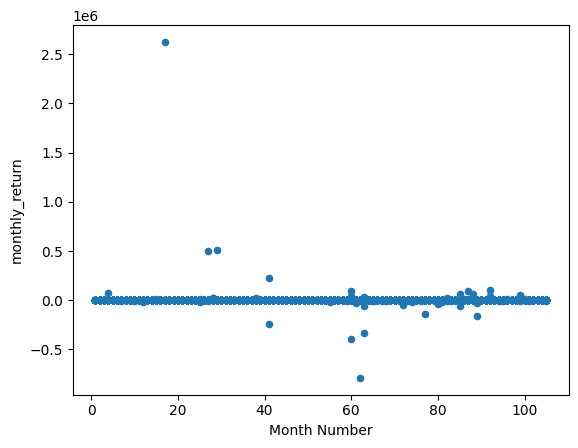

In [38]:
scatter = monthly_returns01.plot.scatter(x = "Month Number", y = "monthly_return")
# plt.show()

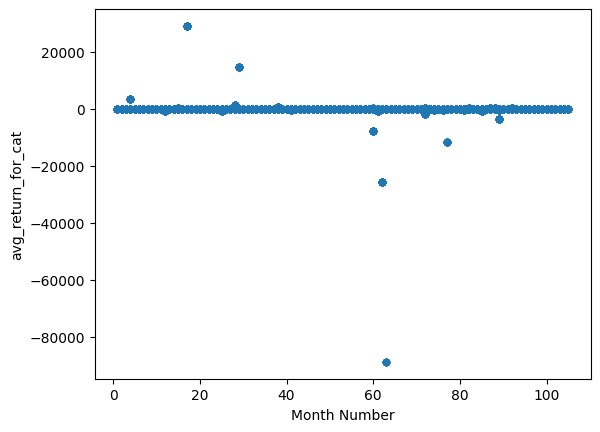

In [39]:
scatter1 = monthly_returns01.plot.scatter(x = "Month Number", y = "avg_return_for_cat")

In [50]:
monthly_returns01["avg_return_for_cat"].describe()

c:\Users\AzureVirtualDesktopU\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    4.518090e+05
mean              NaN
std               NaN
min              -inf
25%      9.959123e-01
50%      1.130978e+00
75%      5.435626e+00
max               inf
Name: avg_return_for_cat, dtype: float64